In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://finance.yahoo.com/crypto/?offset=0&count=100'
page=requests.get(url)

soup=BeautifulSoup(page.text, 'html')

In [3]:
#print(soup)

In [9]:
#Find the required table
table = soup.find_all('table')
#table

In [10]:
#Get the details of column headers in table
for row in table:
    column_headers = row.find_all('th') #titles

In [11]:
#column_headers

In [12]:
#Split the necessary column titles
column_titles = [title.text.strip() for title in column_headers] 
print(column_titles)


['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Market Cap', 'Volume in Currency (Since 0:00 UTC)', 'Volume in Currency (24Hr)', 'Total Volume All Currencies (24Hr)', 'Circulating Supply', '52 Week Range', 'Day Chart']


In [14]:
#store the column title to a dataframe
import pandas as pd
data=pd.DataFrame(columns=column_titles)

In [15]:
data

Empty DataFrame
Columns: [Symbol, Name, Price (Intraday), Change, % Change, Market Cap, Volume in Currency (Since 0:00 UTC), Volume in Currency (24Hr), Total Volume All Currencies (24Hr), Circulating Supply, 52 Week Range, Day Chart]
Index: []

In [18]:
#Gather column data
for t in table: 
    column_data = t.find_all('tr')
    for row in column_data:
        pass
#column_data

In [19]:
#gather row data
for row in column_data[1:]:
    row_data=row.find_all('td')
    individual_row_data=[data.text.strip() for data in row_data]
    length=len(data)
    data.loc[length] = individual_row_data

In [20]:
data.head(5)

Symbol             Name Price (Intraday)     Change % Change Market Cap  \
0   BTC-USD      Bitcoin USD        51,503.41    +752.69   +1.48%     1.011T   
1   ETH-USD     Ethereum USD         2,996.08     +75.05   +2.57%   359.998B   
2  USDT-USD  Tether USDt USD         0.999955  +0.000026   +0.00%    97.906B   
3   BNB-USD          BNB USD           380.88      +5.74   +1.53%    56.955B   
4   SOL-USD       Solana USD           103.41      +4.08   +4.11%    45.613B   

  Volume in Currency (Since 0:00 UTC) Volume in Currency (24Hr)  \
0                             15.113B                   15.113B   
1                             10.852B                   10.852B   
2                             33.331B                   33.331B   
3                              1.076B                    1.076B   
4                              1.032B                    1.032B   

  Total Volume All Currencies (24Hr) Circulating Supply 52 Week Range  \
0                            15.113B            19.637M                 
1                            10.852B           120.157M                 
2                            33.331B            97.911B                 
3                             1.076B           149.533M                 
4                             1.032B           441.083M                 

  Day Chart  
0            
1            
2            
3            
4

In [21]:
#get data of other pages
for outer_row in table:
    nested_table = outer_row.find('table')
    if nested_table:
        nested_rows = nested_table.find_all('tr')
        for nested_row in nested_rows:
            pass
    else:
        pass


In [26]:
#Gather the new row data of other pages
for row in column_data[1:]:
    row_data=row.find_all('td')
    individual_row_data=[data.text.strip() for data in row_data]
    length=len(data)
    data.loc[length] = individual_row_data

In [25]:
data.head(50)

Symbol                   Name Price (Intraday)       Change  \
0        BTC-USD            Bitcoin USD        51,503.41      +752.69   
1        ETH-USD           Ethereum USD         2,996.08       +75.05   
2       USDT-USD        Tether USDt USD         0.999955    +0.000026   
3        BNB-USD                BNB USD           380.88        +5.74   
4        SOL-USD             Solana USD           103.41        +4.08   
5        XRP-USD                XRP USD         0.545087    +0.010405   
6      STETH-USD    Lido Staked ETH USD         2,993.44       +72.20   
7       USDC-USD           USD Coin USD           1.0001      +0.0001   
8        ADA-USD            Cardano USD         0.596292    +0.018150   
9       AVAX-USD          Avalanche USD            36.74        +1.01   
10      DOGE-USD           Dogecoin USD         0.085823    +0.001300   
11       TRX-USD               TRON USD         0.137714    -0.000175   
12      WTRX-USD       Wrapped TRON USD         0.137201    -0.001061   
13      LINK-USD          Chainlink USD            18.55        +0.58   
14       DOT-USD           Polkadot USD           7.7807      +0.2395   
15     MATIC-USD            Polygon USD         0.990617    +0.005429   
16      WBTC-USD    Wrapped Bitcoin USD        51,529.32      +785.35   
17  TON11419-USD            Toncoin USD           2.1073      +0.0311   
18   UNI7083-USD            Uniswap USD            11.33        -0.70   
19       ICP-USD  Internet Computer USD            12.52        +0.35   
20      SHIB-USD          Shiba Inu USD       0.00000962  +0.00000019   
21       DAI-USD                Dai USD           1.0001      +0.0001   
22       BCH-USD       Bitcoin Cash USD           268.02        +2.51   
23       LTC-USD           Litecoin USD            70.28        +1.09   
24  IMX10603-USD          Immutable USD           3.0875      +0.0766   
25       BTC-USD            Bitcoin USD        51,503.41      +752.69   
26       ETH-USD           Ethereum USD         2,996.08       +75.05   
27      USDT-USD        Tether USDt USD         0.999955    +0.000026   
28       BNB-USD                BNB USD           380.88        +5.74   
29       SOL-USD             Solana USD           103.41        +4.08   
30       XRP-USD                XRP USD         0.545087    +0.010405   
31     STETH-USD    Lido Staked ETH USD         2,993.44       +72.20   
32      USDC-USD           USD Coin USD           1.0001      +0.0001   
33       ADA-USD            Cardano USD         0.596292    +0.018150   
34      AVAX-USD          Avalanche USD            36.74        +1.01   
35      DOGE-USD           Dogecoin USD         0.085823    +0.001300   
36       TRX-USD               TRON USD         0.137714    -0.000175   
37      WTRX-USD       Wrapped TRON USD         0.137201    -0.001061   
38      LINK-USD          Chainlink USD            18.55        +0.58   
39       DOT-USD           Polkadot USD           7.7807      +0.2395   
40     MATIC-USD            Polygon USD         0.990617    +0.005429   
41      WBTC-USD    Wrapped Bitcoin USD        51,529.32      +785.35   
42  TON11419-USD            Toncoin USD           2.1073      +0.0311   
43   UNI7083-USD            Uniswap USD            11.33        -0.70   
44       ICP-USD  Internet Computer USD            12.52        +0.35   
45      SHIB-USD          Shiba Inu USD       0.00000962  +0.00000019   
46       DAI-USD                Dai USD           1.0001      +0.0001   
47       BCH-USD       Bitcoin Cash USD           268.02        +2.51   
48       LTC-USD           Litecoin USD            70.28        +1.09   
49  IMX10603-USD          Immutable USD           3.0875      +0.0766   

   % Change Market Cap Volume in Currency (Since 0:00 UTC)  \
0    +1.48%     1.011T                             15.113B   
1    +2.57%   359.998B                             10.852B   
2    +0.00%    97.906B                             33.331B   
3    +1.53%    56.955B                

In [27]:
#drop irrelevant axes
data.drop(['52 Week Range','Day Chart'], axis=1, inplace=True)

In [28]:
data.to_csv(r'/Users/apple/Desktop/webscrape_of_crypto_cleaned.csv', index=False)

In [29]:
import re
import pandas as pd
import numpy as np

def currency_converter(value):
    # Regular expression to capture numeric part and multiplier
    match = re.match(r'([\d.]+)\s*([BMT]?)', str(value))
    if match:
        numeric_part = float(match.group(1))
        multiplier = match.group(2)
        if multiplier == 'B':
            return numeric_part * 1e9  # Convert billion to units
        elif multiplier == 'T':
            return numeric_part * 1e12 # Convert trillion to units
        else:
            return numeric_part  * 1e6 #convert million to units
    else:
        return np.nan  # Return NaN for invalid values


data['Market Cap'] = data['Market Cap'].apply(currency_converter)
data['Volume in Currency (Since 0:00 UTC)'] = data['Volume in Currency (Since 0:00 UTC)'].apply(currency_converter)
data['Volume in Currency (24Hr)']=data['Volume in Currency (24Hr)'].apply(currency_converter)
data['Total Volume All Currencies (24Hr)']=data['Total Volume All Currencies (24Hr)'].apply(currency_converter)
data['Circulating Supply']=data['Circulating Supply'].apply(currency_converter)
data['% Change']=data['% Change'].str.replace('%', '')

In [30]:
data

Symbol              Name Price (Intraday)       Change % Change  \
0        BTC-USD       Bitcoin USD        51,503.41      +752.69    +1.48   
1        ETH-USD      Ethereum USD         2,996.08       +75.05    +2.57   
2       USDT-USD   Tether USDt USD         0.999955    +0.000026    +0.00   
3        BNB-USD           BNB USD           380.88        +5.74    +1.53   
4        SOL-USD        Solana USD           103.41        +4.08    +4.11   
..           ...               ...              ...          ...      ...   
70      SHIB-USD     Shiba Inu USD       0.00000962  +0.00000019    +1.99   
71       DAI-USD           Dai USD           1.0001      +0.0001    +0.01   
72       BCH-USD  Bitcoin Cash USD           268.02        +2.51    +0.95   
73       LTC-USD      Litecoin USD            70.28        +1.09    +1.58   
74  IMX10603-USD     Immutable USD           3.0875      +0.0766    +2.54   

      Market Cap  Volume in Currency (Since 0:00 UTC)  \
0   1.011000e+12                         1.511300e+10   
1   3.599980e+11                         1.085200e+10   
2   9.790600e+10                         3.333100e+10   
3   5.695500e+10                         1.076000e+09   
4   4.561300e+10                         1.032000e+09   
..           ...                                  ...   
70  5.672000e+09                         1.174040e+08   
71  5.348000e+09                         1.086150e+08   
72  5.267000e+09                         1.514310e+08   
73  5.217000e+09                         2.379850e+08   
74  4.289000e+09                         8.539900e+07   

    Volume in Currency (24Hr)  Total Volume All Currencies (24Hr)  \
0                1.511300e+10                        1.511300e+10   
1                1.085200e+10                        1.085200e+10   
2                3.333100e+10                        3.333100e+10   
3                1.076000e+09                        1.076000e+09   
4                1.032000e+09                        1.032000e+09   
..                        ...                                 ...   
70               1.174040e+08                        1.174040e+08   
71               1.086150e+08                        1.086150e+08   
72               1.514310e+08                        1.514310e+08   
73               2.379850e+08                        2.379850e+08   
74               8.539900e+07                        8.539900e+07   

    Circulating Supply  
0         1.963700e+07  
1         1.201570e+08  
2         9.791100e+10  
3         1.495330e+08  
4         4.410830e+08  
..                 ...  
70        5.892900e+14  
71        5.348000e+09  
72        1.965100e+07  
73        7.424300e+07  
74        1.389000e+09  

[75 rows x 10 columns]

In [31]:
data.describe()

Market Cap  Volume in Currency (Since 0:00 UTC)  \
count  7.500000e+01                         7.500000e+01   
mean   7.257360e+10                         2.807994e+09   
std    2.052572e+11                         7.188121e+09   
min    4.289000e+09                         2.253000e+07   
25%    6.778000e+09                         1.196090e+08   
50%    1.207500e+10                         3.089430e+08   
75%    2.935000e+10                         1.032000e+09   
max    1.011000e+12                         3.333100e+10   

       Volume in Currency (24Hr)  Total Volume All Currencies (24Hr)  \
count               7.500000e+01                        7.500000e+01   
mean                2.807994e+09                        2.807994e+09   
std                 7.188121e+09                        7.188121e+09   
min                 2.253000e+07                        2.253000e+07   
25%                 1.196090e+08                        1.196090e+08   
50%                 3.089430e+08                        3.089430e+08   
75%                 1.032000e+09                        1.032000e+09   
max                 3.333100e+10                        3.333100e+10   

       Circulating Supply  
count        7.500000e+01  
mean         2.359398e+13  
std          1.162498e+14  
min          9.805000e+06  
25%          1.570000e+08  
50%          1.283000e+09  
75%          3.547000e+10  
max          5.892900e+14

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volume in Currency (Since 0:00 UTC)', ylabel='Market Cap'>

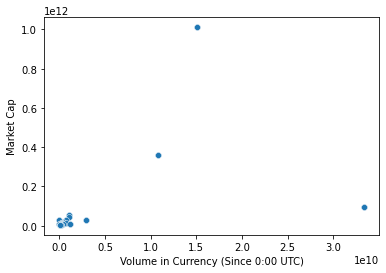

In [32]:
import seaborn as sns
sns.scatterplot(data['Volume in Currency (Since 0:00 UTC)'],data['Market Cap'])

In [33]:
import numpy as np
a=data['Market Cap']
log_a=np.log(a)
log_a.min()

22.179319442481155

In [34]:
b=data['Volume in Currency (Since 0:00 UTC)']
log_b=np.log(b)
log_b.min()

16.930358312408426

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Market Cap', ylabel='Volume in Currency (Since 0:00 UTC)'>

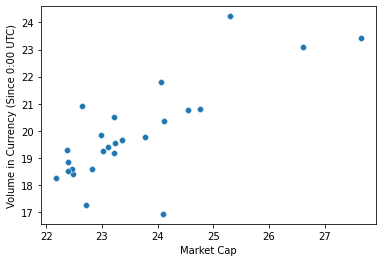

In [35]:
sns.scatterplot(log_a,log_b)

In [37]:
high_market_cap_threshold = np.percentile(log_a, 60)  # Example threshold for high market capitalization, 60th percentile
high_volume_threshold = np.percentile(log_b, 70)  # Example threshold for high volume, 70th percentile

# Filter the dataset, based on the thresholds
high_market_cap_high_volume = data[(log_a >= high_market_cap_threshold) & (log_b >= high_volume_threshold)]

print(high_market_cap_high_volume)


      Symbol             Name Price (Intraday)     Change % Change  \
0    BTC-USD      Bitcoin USD        51,503.41    +752.69    +1.48   
1    ETH-USD     Ethereum USD         2,996.08     +75.05    +2.57   
2   USDT-USD  Tether USDt USD         0.999955  +0.000026    +0.00   
3    BNB-USD          BNB USD           380.88      +5.74    +1.53   
4    SOL-USD       Solana USD           103.41      +4.08    +4.11   
7   USDC-USD     USD Coin USD           1.0001    +0.0001    +0.01   
25   BTC-USD      Bitcoin USD        51,503.41    +752.69    +1.48   
26   ETH-USD     Ethereum USD         2,996.08     +75.05    +2.57   
27  USDT-USD  Tether USDt USD         0.999955  +0.000026    +0.00   
28   BNB-USD          BNB USD           380.88      +5.74    +1.53   
29   SOL-USD       Solana USD           103.41      +4.08    +4.11   
32  USDC-USD     USD Coin USD           1.0001    +0.0001    +0.01   
50   BTC-USD      Bitcoin USD        51,503.41    +752.69    +1.48   
51   ETH-USD     Eth